In [12]:
# !pip install -U scikit-learn

In [13]:
import sklearn

print(sklearn.__version__)

0.22.2.post1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import StandardScaler, scale

#### Download and load the Diabetes dataset
Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [4]:
df = pd.read_csv('datasets/diabetes.csv')

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
print('Age, average: ', np.mean(df['Age'].values))

print('Age, median :', np.median(df['Age'].values))

print('Age, variance:  ', np.var(df['Age'].values))

print('Age, standard deviation: ', np.std(df['Age'].values))

Age, average:  33.240885416666664
Age, median : 29.0
Age, variance:   138.12296379937067
Age, standard deviation:  11.752572645994181


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### plt.show() is needed if you're running Matplotlib in non-interactive mode
Box Plot details:
* Upper box edge: Q3
* Lower box edge: Q1
* Horizontal line inside box: Median
* Whiskers: Extend up to extreme value or up to 1.5xIQR from Q1 or Q3
* Circles: Outliers (beyond 1.5xIQR from Q1 and Q3)

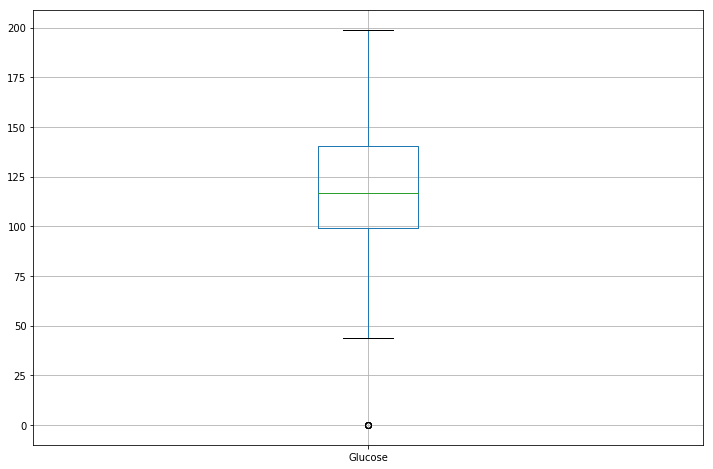

In [9]:
df.boxplot(column=['Glucose'], figsize=(12, 8))

plt.show()

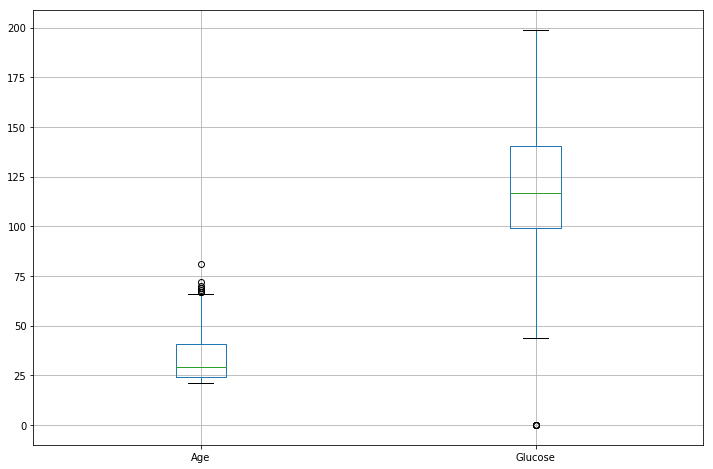

In [10]:
df.boxplot(column=['Age', 'Glucose'], figsize=(12, 8))

plt.show()

#### The series are not in the same scale
The three columns have different ranges and magnitudes due to which the box plot is skewed. Algorithms which use Euclidean Distance measure (e.g. K-means, PCA) are sensitive to magnitudes. Scaling can mitigate this by getting all the features to be weight equally

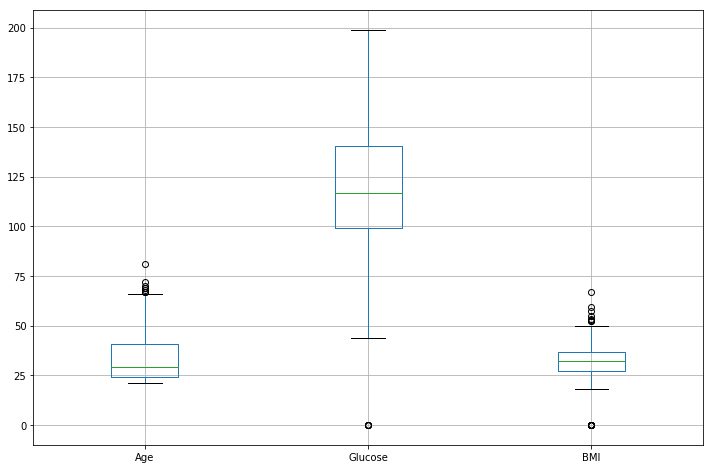

In [11]:
df.boxplot(column=['Age', 'Glucose','BMI'], figsize=(12, 8))

plt.show()